In [1]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
df.shape

(200, 5)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df["A"]=df[["Annual Income (k$)"]]
df["B"]=df[["Spending Score (1-100)"]]

In [10]:
X=df[["A","B"]]
X.head()

,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

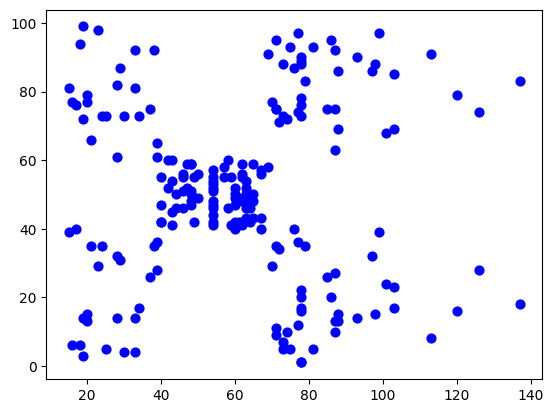

In [13]:
plt.scatter(X["A"],X["B"],s=40,c='b')
plt.show()

In [17]:
Kmean=KMeans(n_clusters=8)
Kmean.fit(X)

centres=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 25.14285714  19.52380952]
 [ 78.55172414  82.17241379]
 [ 45.97368421  51.26315789]
 [ 79.73913043  13.39130435]
 [ 25.0952381   80.04761905]
 [109.7         22.        ]
 [ 62.58333333  47.29166667]
 [109.7         82.        ]]


In [49]:
clusters=Kmean.fit_predict(X)
df["label"]=clusters
df.head(100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,5
1,2,Male,21,15,81,15,81,4
2,3,Female,20,16,6,16,6,5
3,4,Female,23,16,77,16,77,4
4,5,Female,31,17,40,17,40,5
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,6
96,97,Female,47,60,47,60,47,6
97,98,Female,27,60,50,60,50,6
98,99,Male,48,61,42,61,42,6


In [50]:
col=['green','blue','black','yellow','orange']

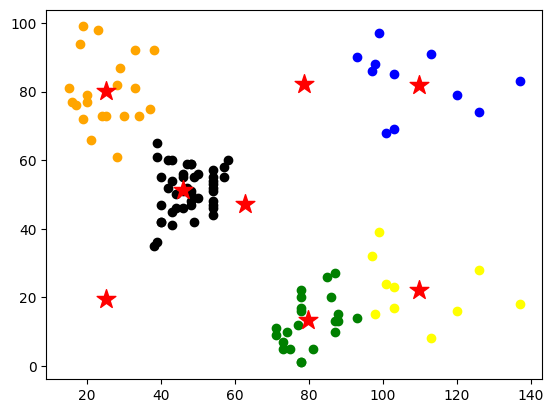

In [51]:
for i in range(5):
  a=col[i]
  #print(a)
  plt.scatter(df.A[df.label==i],df.B[df.label==i],c=a,label='cluster1')
plt.scatter(centres[:,0],centres[:,1],marker='*',s=200,c='r',label='centroid')

In [52]:
X1=X.loc[:,["A","B"]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

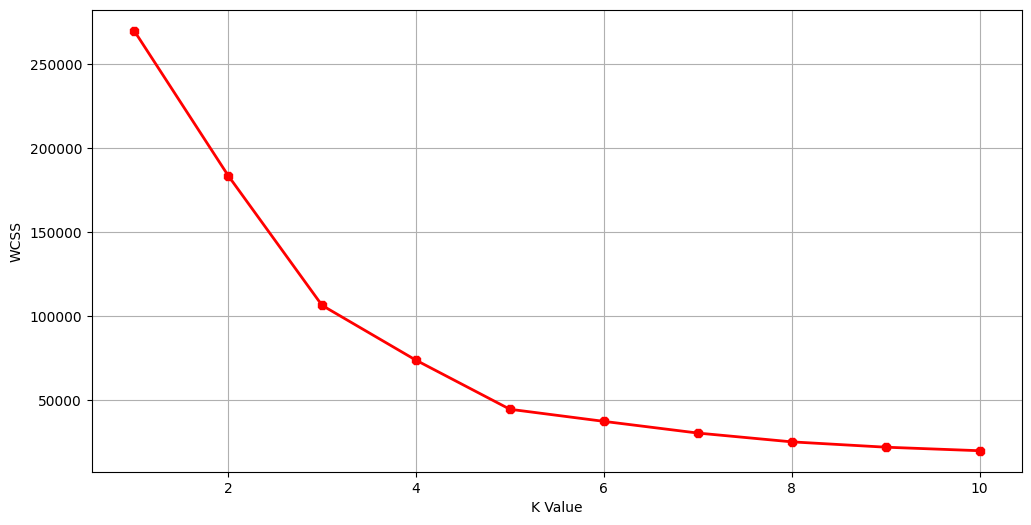

In [59]:
wcss=[]
for K in range(1,11):
  Kmeans = KMeans(n_clusters = K, init='k-means++' )
  Kmeans.fit(X1) # Align indentation with the line above
  wcss.append(Kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show
